In [117]:
# for data processing
import numpy as np
import pandas as pd

# for vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data

In [3]:
df = pd.read_csv("Crimes_-_2001_to_present.csv")

C:\Users\yamti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [44]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [45]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

# timestamp columns analysis

In [46]:
# timestamp things
case_per_day = df[["Date","Case Number","Primary Type"]]
case_per_day["Day"] = case_per_day["Date"].apply(lambda x:x[:10])

<ipython-input-46-ebeee4cf6106>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_per_day["Day"] = case_per_day["Date"].apply(lambda x:x[:10])


In [47]:
case_per_day.head()

,Date,Case Number,Primary Type,Day
0,01/01/2001 11:00:00 AM,JA366925,DECEPTIVE PRACTICE,01/01/2001
1,10/08/2017 03:00:00 AM,JB147188,CRIM SEXUAL ASSAULT,10/08/2017
2,03/28/2017 02:00:00 PM,JB147595,BURGLARY,03/28/2017
3,09/09/2017 08:17:00 PM,JB147230,THEFT,09/09/2017
4,08/26/2017 10:00:00 AM,JB147599,CRIM SEXUAL ASSAULT,08/26/2017


In [48]:
case_per_day_gb = case_per_day[["Day","Case Number"]].groupby('Day').count().sort_values('Case Number', ascending=False)
case_per_day_gb = case_per_day_gb.reset_index().rename(columns={'Case Number': 'Case Count'})
case_per_day_gb.head()

,Day,Case Count
0,01/01/2003,2027
1,01/01/2005,1968
2,01/01/2007,1950
3,01/01/2006,1908
4,01/01/2004,1891


In [49]:
case_per_day_gb.describe()

,Case Count
count,7106.000000
mean,1004.594146
std,270.010057
min,320.000000
25%,772.000000
50%,990.000000
75%,1242.000000
max,2027.000000


In [64]:
df_year = df[["ID","Year"]]
df_year = df_year.groupby("Year").count().sort_values("ID", ascending=False)
df_year = df_year.reset_index()

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5]),
 <a list of 10 Text major ticklabel objects>)

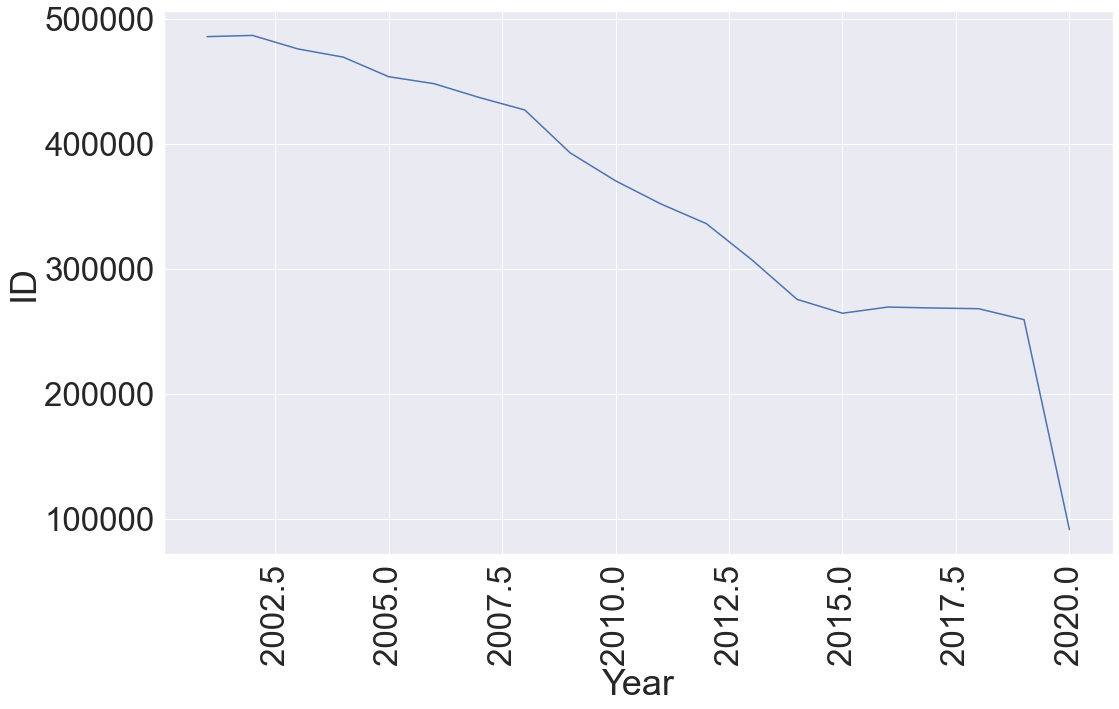

In [119]:
# crime trend in the last two decades.

ax1 = plt.subplots(1, figsize=(17, 10), sharex=True)
sns.lineplot(data=df_year, x=df_year.columns[0], y=df_year.columns[1])
sns.set(font_scale=3)
plt.xticks(rotation='vertical')

# Type analysis

In [77]:
Type_gb = df[["ID","Primary Type"]].groupby("Primary Type").count().sort_values("ID", ascending=False)

In [78]:
Type_gb = Type_gb.reset_index().rename(columns={'Primary Type': 'Type of case', 'ID': 'number of cases'})

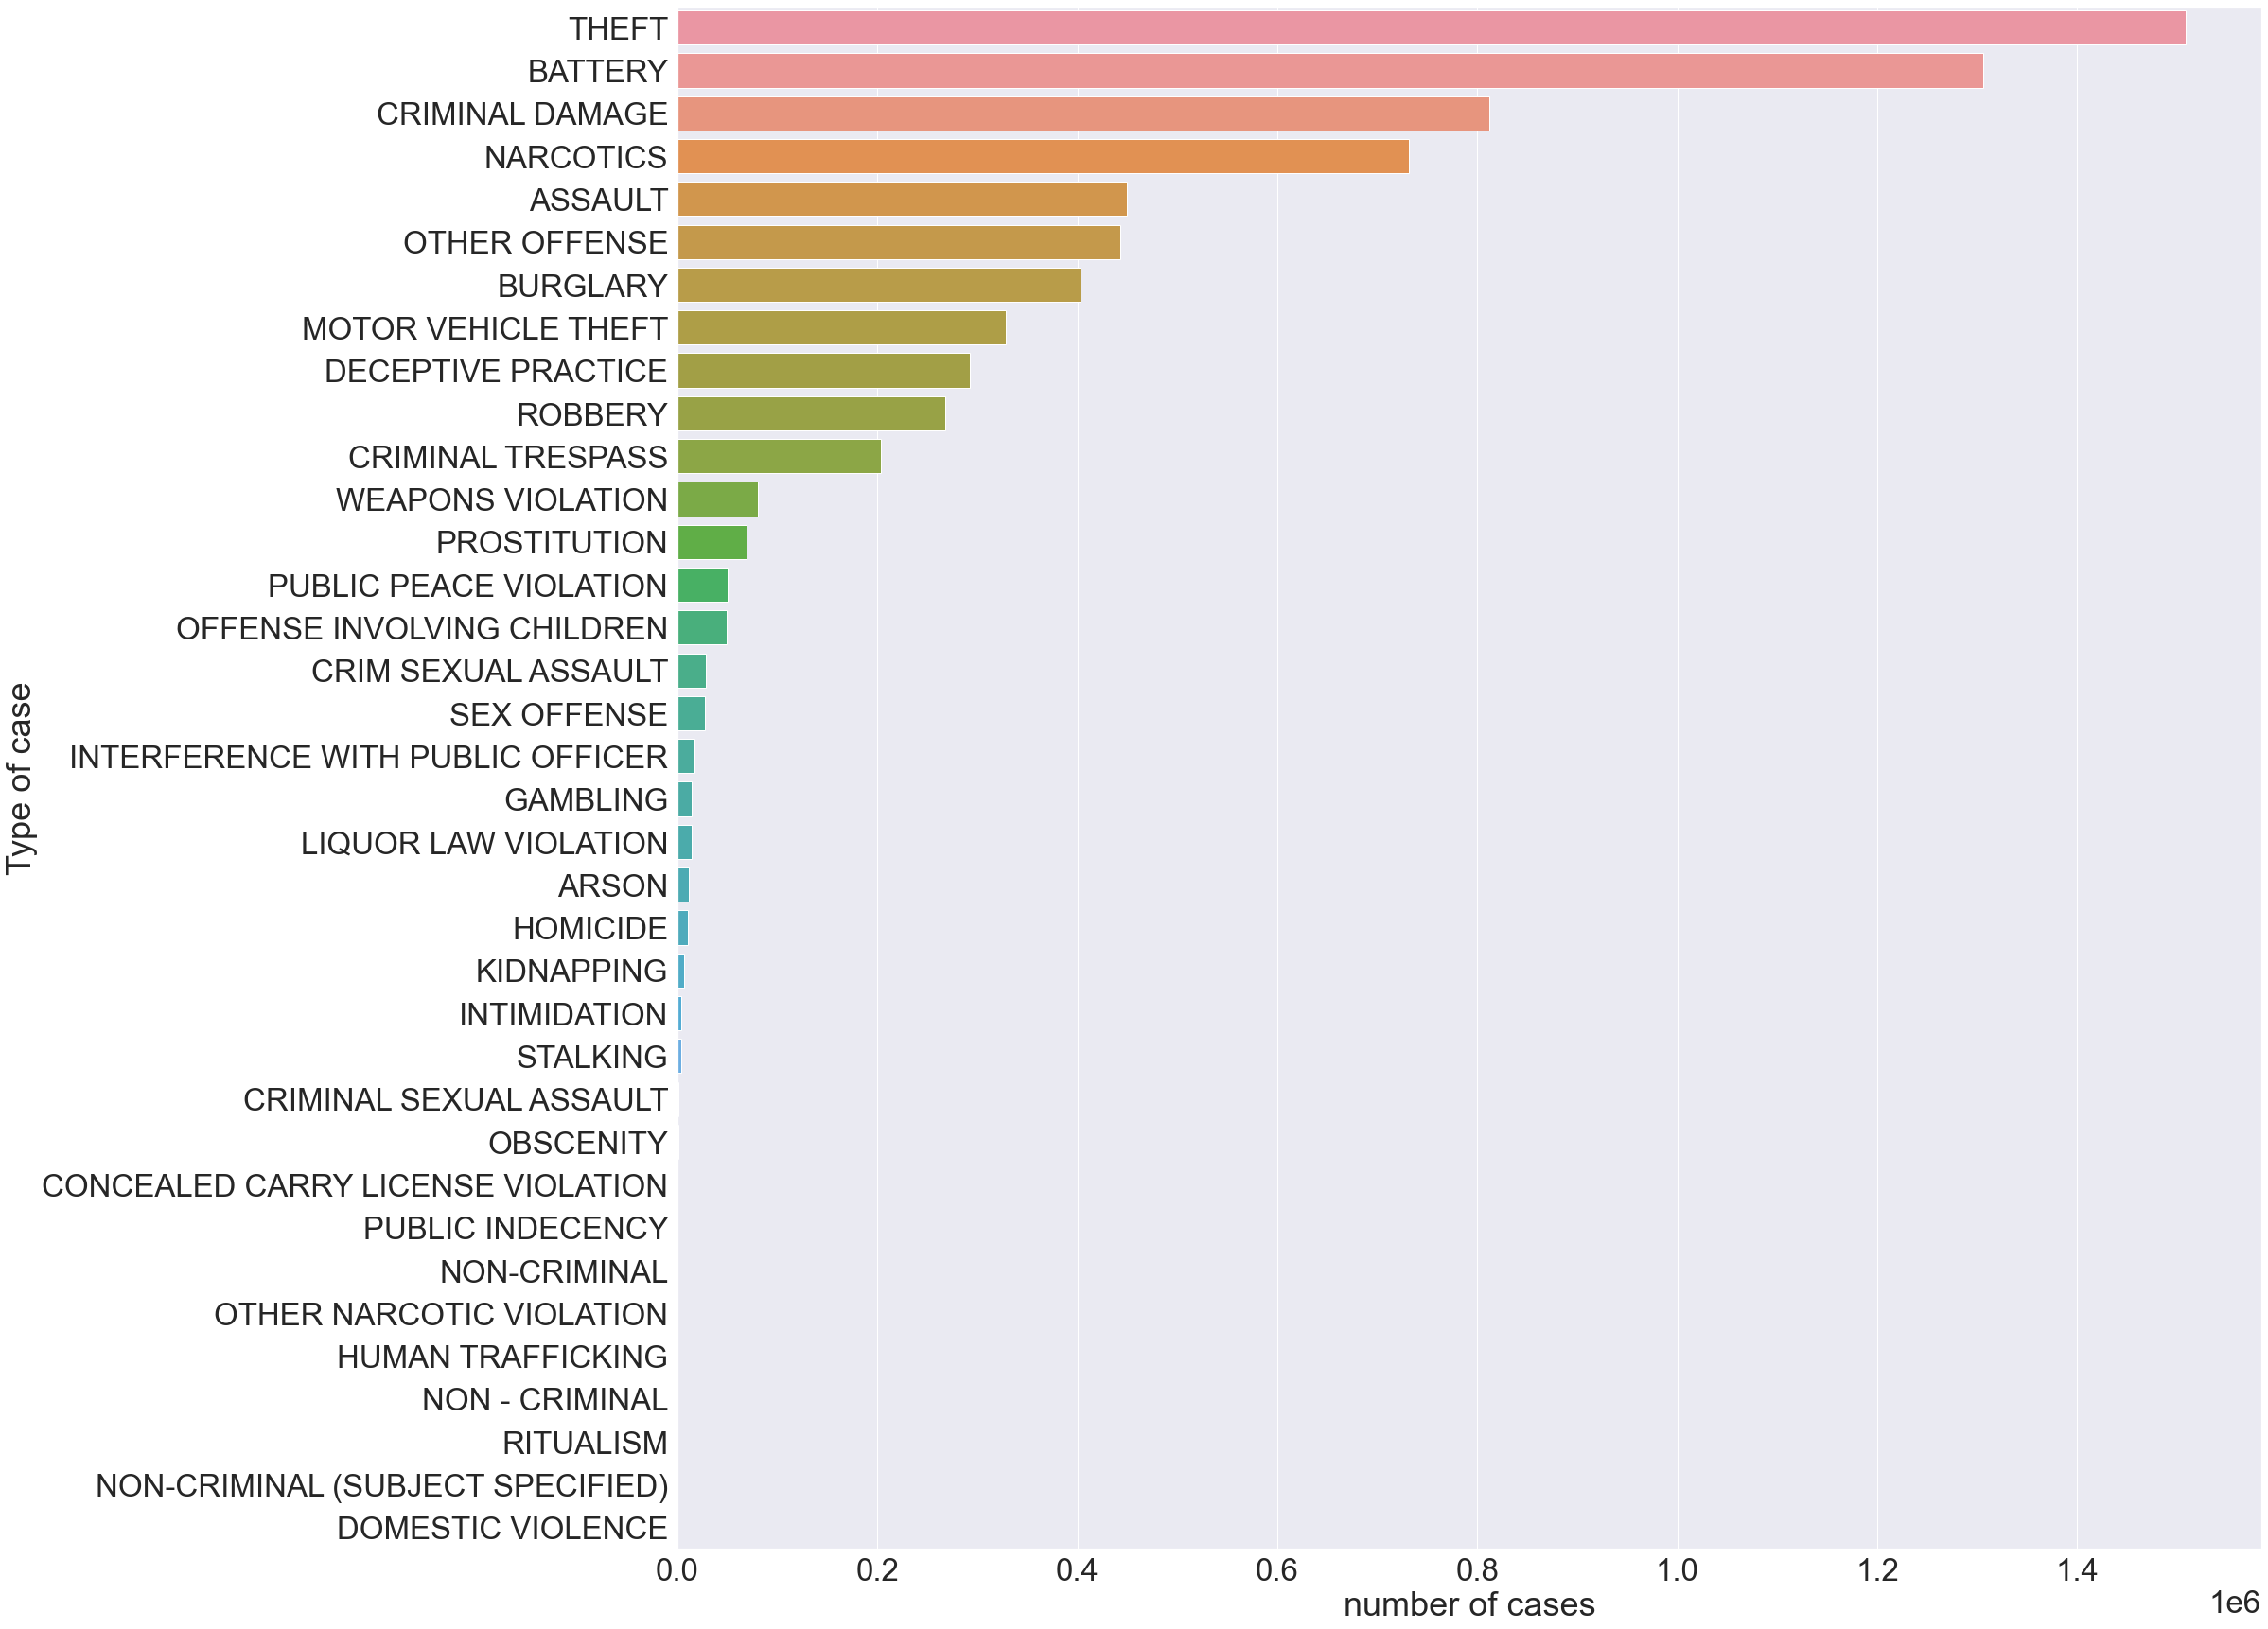

In [98]:
ax1 = plt.subplots(1, figsize=(30, 30), sharex=True)
sns.barplot(data=Type_gb, x=Type_gb.columns[1], y=Type_gb.columns[0])
sns.set(font_scale=3)

# calculating the number of different crime types per district

In [35]:
df_district = df[["ID","Primary Type","District"]]

In [36]:
for group_name, group_df in df_district.groupby("District"):
    df_2 = group_df.groupby("Primary Type").count().sort_values("ID", ascending=False)
    group_name = str(group_name)[:-2]
    df_2.to_csv("district_{num}.csv".format(num=group_name))

choose the number of district that you want to plot:  1


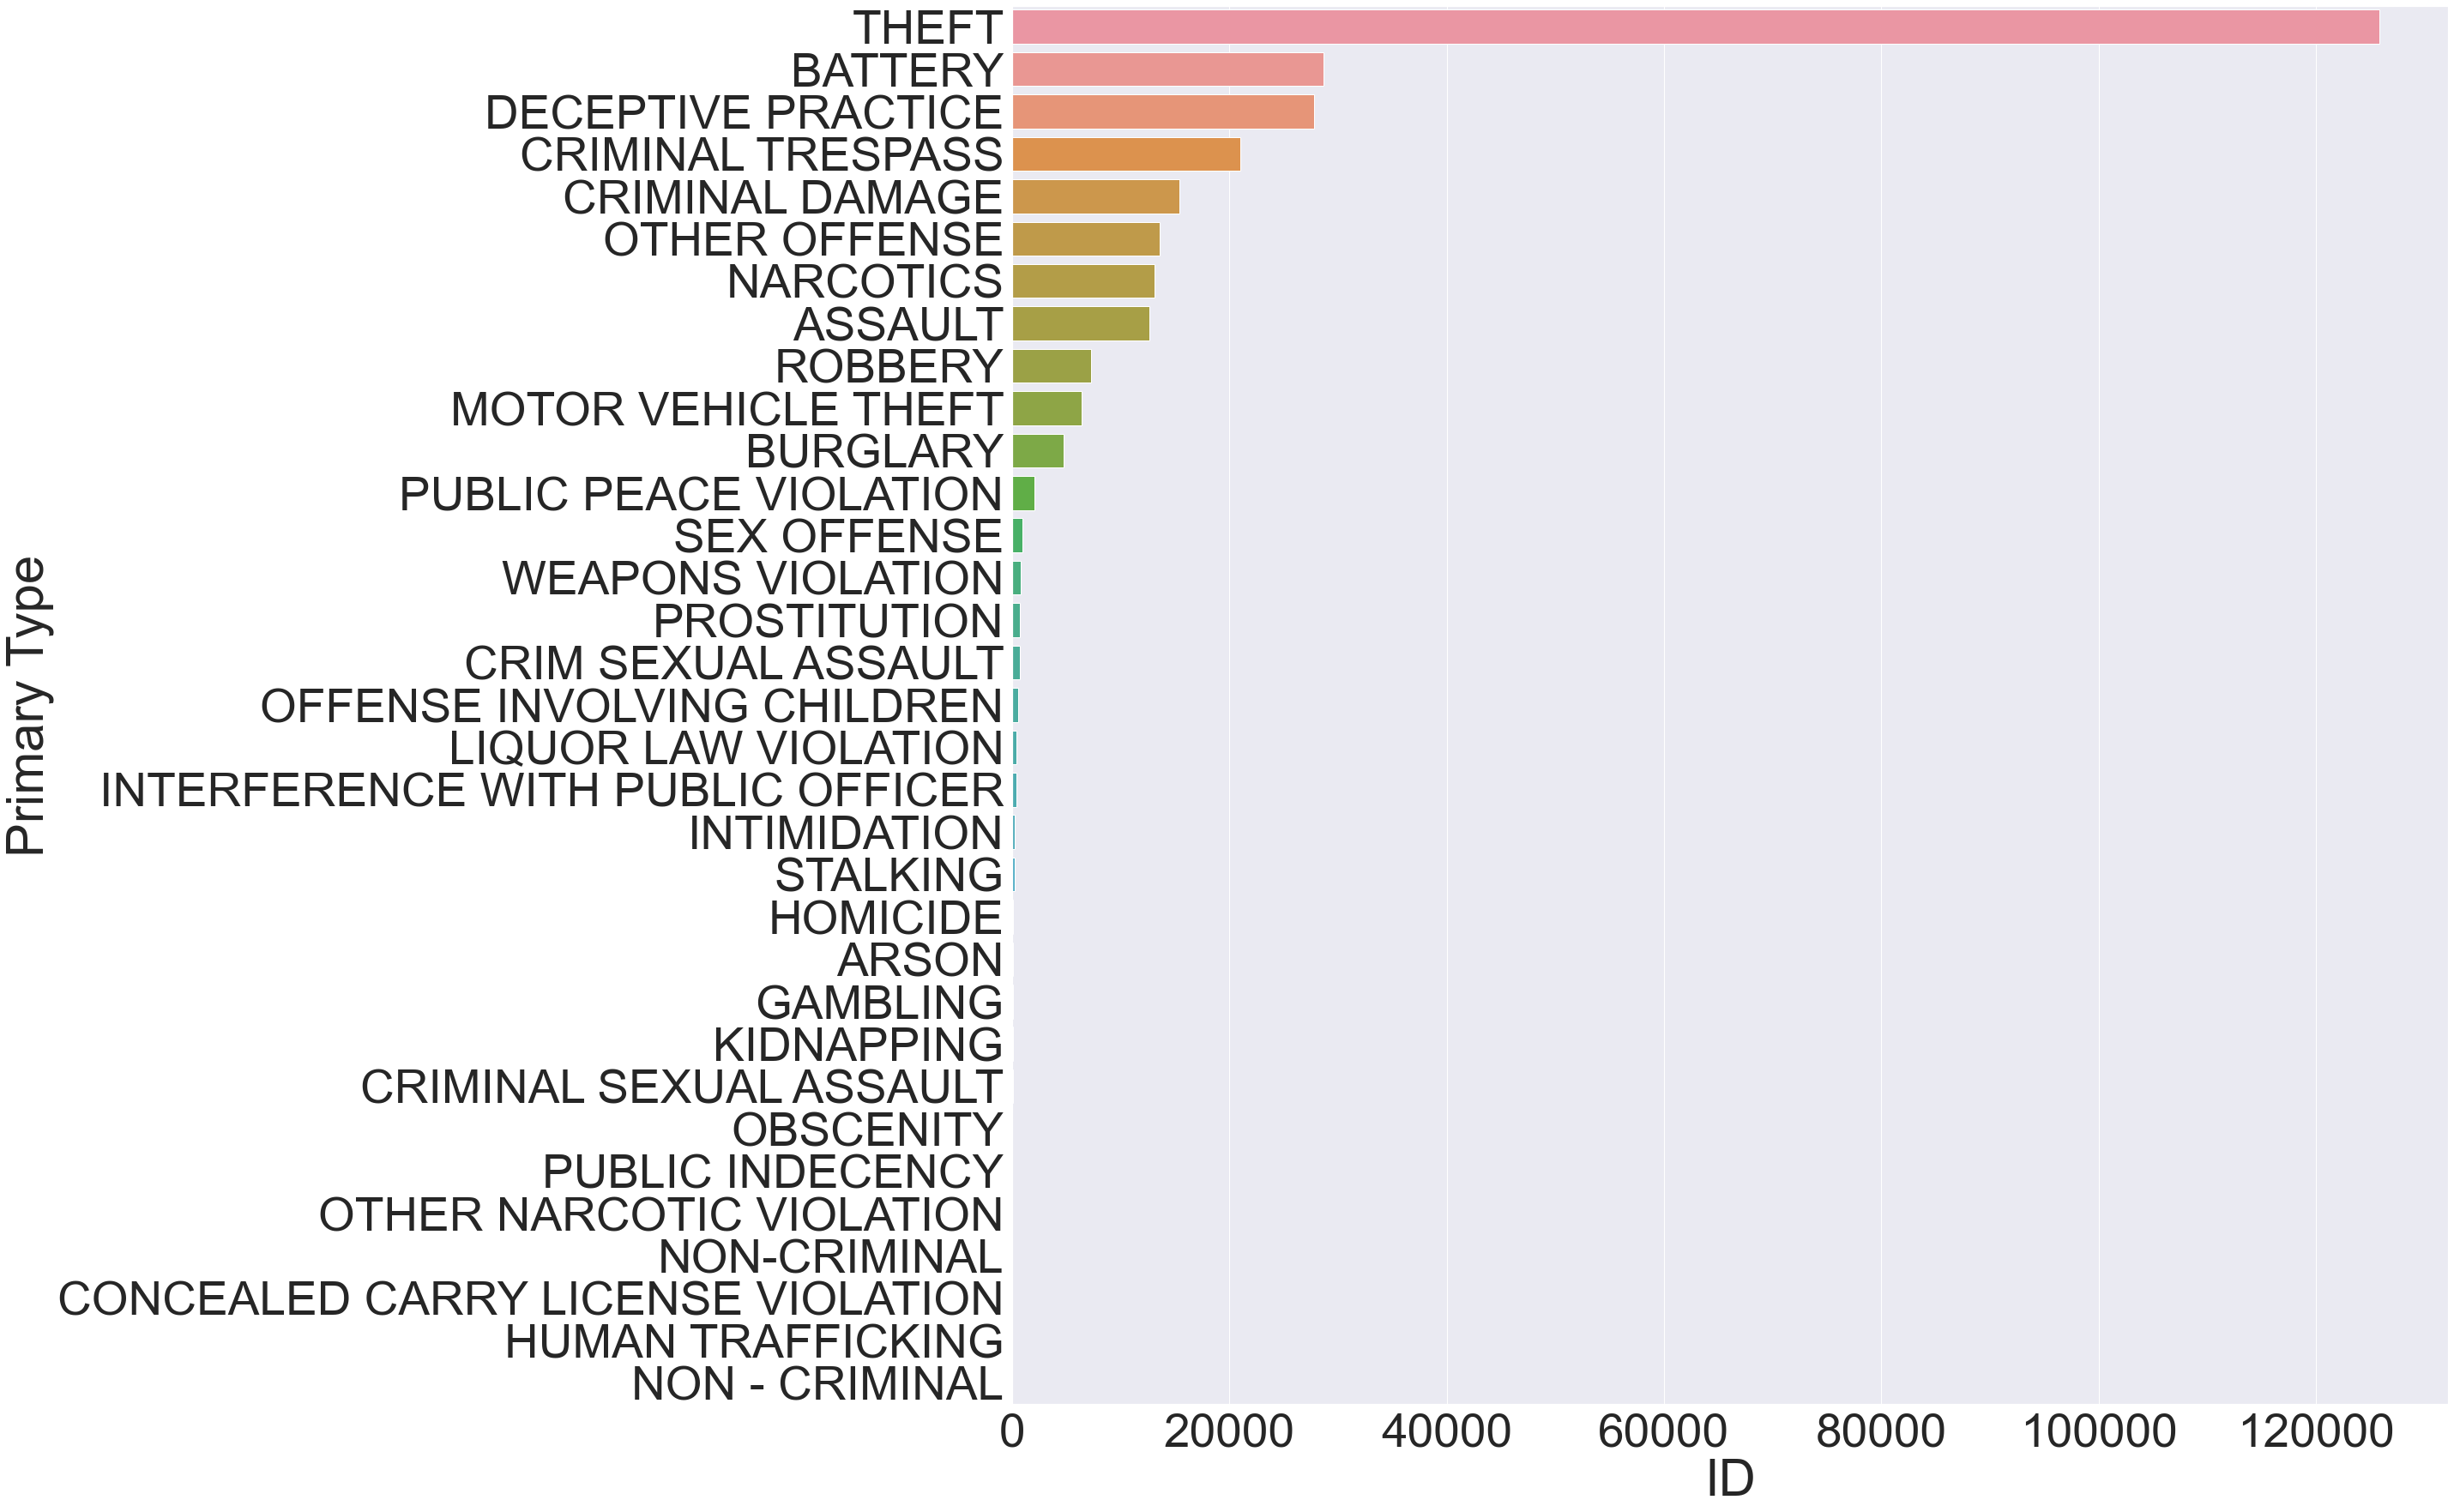

In [40]:
x = "district_"+input("choose the number of district that you want to plot: ")
df = pd.read_csv(x+".csv")


ax1 = plt.subplots(1, figsize=(30, 30), sharex=True)
sns.barplot(data=df, x=df.columns[1], y=df.columns[0])
sns.set(font_scale=5)